<a href="https://colab.research.google.com/github/priyanu17/flight_delay_prediction/blob/master/Flight_Delay_analysis_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
flight_2019 = pd.read_csv("drive/My Drive/Jan_2019_ontime.csv")
flight_2020 = pd.read_csv("drive/My Drive/Jan_2020_ontime.csv")

In [4]:
## PROBLEM STATEMENT:

# Based on given data predict future flight delays for the month of January

In [5]:
flight_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [6]:
flight_2020.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [7]:
# Shape of datasets

In [8]:
flight_2019.shape

(583985, 22)

In [9]:
flight_2020.shape

(607346, 22)

In [10]:
# Info on datasets:

In [11]:
flight_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [12]:
flight_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [13]:
# Describe on datasets:

In [14]:
flight_2019.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DAY_OF_MONTH,583985.0,1.596009e+01,8.987942,1.0,8.0,16.0,24.0,31.0
DAY_OF_WEEK,583985.0,3.835626e+00,1.921899,1.0,2.0,4.0,5.0,7.0
OP_CARRIER_AIRLINE_ID,583985.0,1.998321e+04,377.724638,19393.0,19790.0,19977.0,20368.0,20452.0
OP_CARRIER_FL_NUM,583985.0,2.537869e+03,1821.736145,1.0,979.0,2114.0,3902.0,7439.0
ORIGIN_AIRPORT_ID,583985.0,1.265970e+04,1519.405493,10135.0,11292.0,12889.0,13931.0,16218.0
ORIGIN_AIRPORT_SEQ_ID,583985.0,1.265974e+06,151940.299913,1013505.0,1129202.0,1288903.0,1393102.0,1621802.0
DEST_AIRPORT_ID,583985.0,1.265947e+04,1519.336466,10135.0,11292.0,12889.0,13931.0,16218.0
DEST_AIRPORT_SEQ_ID,583985.0,1.265951e+06,151933.397101,1013505.0,1129202.0,1288903.0,1393102.0,1621802.0
DEP_TIME,567633.0,1.331958e+03,495.404020,1.0,921.0,1328.0,1738.0,2400.0
DEP_DEL15,567630.0,1.742808e-01,0.379351,0.0,0.0,0.0,0.0,1.0


In [15]:
flight_2020.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DAY_OF_MONTH,607346.0,1.601435e+01,8.990719,1.0,8.0,16.0,24.0,31.0
DAY_OF_WEEK,607346.0,3.955735e+00,1.910205,1.0,2.0,4.0,5.0,7.0
OP_CARRIER_AIRLINE_ID,607346.0,1.999414e+04,375.754232,19393.0,19790.0,19977.0,20378.0,20452.0
OP_CARRIER_FL_NUM,607346.0,2.622365e+03,1822.545302,1.0,1070.0,2177.0,4108.0,6860.0
ORIGIN_AIRPORT_ID,607346.0,1.265739e+04,1524.407203,10135.0,11292.0,12889.0,14027.0,16869.0
ORIGIN_AIRPORT_SEQ_ID,607346.0,1.265743e+06,152440.467783,1013506.0,1129202.0,1288903.0,1402702.0,1686901.0
DEST_AIRPORT_ID,607346.0,1.265720e+04,1524.279269,10135.0,11292.0,12889.0,14027.0,16869.0
DEST_AIRPORT_SEQ_ID,607346.0,1.265724e+06,152427.674791,1013506.0,1129202.0,1288903.0,1402702.0,1686901.0
DEP_TIME,600682.0,1.331513e+03,497.095168,1.0,919.0,1326.0,1739.0,2400.0
DEP_DEL15,600647.0,1.363263e-01,0.343135,0.0,0.0,0.0,0.0,1.0


In [16]:
# Dataset columns:

In [17]:
flight_2019.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [18]:
flight_2020.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [19]:
# Both datasets have the same columns 

In [20]:
# Checking for duplicate entries in dataset

In [21]:
flight_2019.duplicated(keep = "first").value_counts()

False    583985
dtype: int64

In [22]:
flight_2020.duplicated(keep = "first").value_counts()

False    607346
dtype: int64

In [23]:
# Data Cleaning

In [24]:
# Adding new "YEAR" parameter to the two datasets:
flight_2019["YEAR"] = 2019
flight_2020["YEAR"] = 2020

In [25]:
# Adding new "MONTH" parameter to the two datasets:
# "MONTH" will be 1 as data is for the month of "JANUARY"
flight_2019["MONTH"] = 1
flight_2020["MONTH"] = 1

In [26]:
# Thus, now we have "YEAR" , "MONTH" , "DAY_OF_MONTH", "DAY_OF_WEEK" : dates of the flight

In [27]:
#  Renaming "DAY_OF_MONTH" as "DAY"
flight_2019.rename(columns = {"DAY_OF_MONTH" : "DAY"}, inplace= True)
flight_2020.rename(columns = {"DAY_OF_MONTH" : "DAY"}, inplace= True)



In [28]:
flight_2019['DATE'] = pd.to_datetime(flight_2019[['YEAR','MONTH', 'DAY']])

In [29]:
flight_2020['DATE'] = pd.to_datetime(flight_2020[['YEAR','MONTH', 'DAY']])

In [30]:
flight_2019["DATE"].unique()

array(['2019-01-01T00:00:00.000000000', '2019-01-02T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-04T00:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-06T00:00:00.000000000',
       '2019-01-07T00:00:00.000000000', '2019-01-08T00:00:00.000000000',
       '2019-01-09T00:00:00.000000000', '2019-01-10T00:00:00.000000000',
       '2019-01-11T00:00:00.000000000', '2019-01-12T00:00:00.000000000',
       '2019-01-13T00:00:00.000000000', '2019-01-14T00:00:00.000000000',
       '2019-01-15T00:00:00.000000000', '2019-01-16T00:00:00.000000000',
       '2019-01-17T00:00:00.000000000', '2019-01-18T00:00:00.000000000',
       '2019-01-19T00:00:00.000000000', '2019-01-20T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-22T00:00:00.000000000',
       '2019-01-23T00:00:00.000000000', '2019-01-24T00:00:00.000000000',
       '2019-01-25T00:00:00.000000000', '2019-01-26T00:00:00.000000000',
       '2019-01-27T00:00:00.000000000', '2019-01-28

In [31]:
flight_2020["DATE"].unique()

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28

In [32]:
flight_2019.columns

Index(['DAY', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID',
       'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK',
       'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE',
       'Unnamed: 21', 'YEAR', 'MONTH', 'DATE'],
      dtype='object')

In [33]:
# Handling "DEP_TIME" and "ARR_TIME" in both datasets:

# They are mentioned in "float64" format 

In [34]:
import datetime

In [35]:
def format_time(t):
    if pd.isnull(t):
        return np.nan
    else:
        if t == 2400: t = 0
        t = "{0:04d}".format(int(t))
        result = datetime.time(int(t[0:2]), int(t[2:4]))
        return result

In [36]:
# Change format of arrival time and departure time in both datasets :

In [37]:
flight_2019['DEP_TIME'] = flight_2019['DEP_TIME'].apply(format_time)
flight_2020['DEP_TIME'] = flight_2020['DEP_TIME'].apply(format_time)
flight_2019['ARR_TIME'] = flight_2019['ARR_TIME'].apply(format_time)
flight_2020['ARR_TIME'] = flight_2020['ARR_TIME'].apply(format_time)


In [38]:
# columns in changed format

In [39]:
flight_2019["DEP_TIME"]

0         06:01:00
1         13:59:00
2         12:15:00
3         15:21:00
4         18:47:00
            ...   
583980    07:49:00
583981    07:17:00
583982    08:57:00
583983    18:20:00
583984    16:36:00
Name: DEP_TIME, Length: 583985, dtype: object

In [40]:
flight_2019["ARR_TIME"]

0         07:22:00
1         16:33:00
2         13:29:00
3         16:25:00
4         19:40:00
            ...   
583980    18:32:00
583981    07:59:00
583982    09:33:00
583983    18:54:00
583984    17:19:00
Name: ARR_TIME, Length: 583985, dtype: object

In [41]:
flight_2020["DEP_TIME"]

0         10:03:00
1         10:27:00
2         18:48:00
3         18:46:00
4         10:38:00
            ...   
607341    10:02:00
607342    17:47:00
607343    05:54:00
607344    17:14:00
607345    18:41:00
Name: DEP_TIME, Length: 607346, dtype: object

In [42]:
flight_2020["ARR_TIME"]

0         11:17:00
1         12:16:00
2         21:20:00
3         20:04:00
4         13:30:00
            ...   
607341    11:28:00
607342    19:33:00
607343    07:52:00
607344    18:11:00
607345    21:28:00
Name: ARR_TIME, Length: 607346, dtype: object

In [43]:
flight_2019.head()

,DAY,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,YEAR,MONTH,DATE
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,06:01:00,0.0,0600-0659,07:22:00,0.0,0.0,0.0,300.0,NaN,2019,1,2019-01-01
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,13:59:00,0.0,1400-1459,16:33:00,0.0,0.0,0.0,596.0,NaN,2019,1,2019-01-01
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,12:15:00,0.0,1200-1259,13:29:00,0.0,0.0,0.0,229.0,NaN,2019,1,2019-01-01
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,15:21:00,0.0,1500-1559,16:25:00,0.0,0.0,0.0,223.0,NaN,2019,1,2019-01-01
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,18:47:00,0.0,1900-1959,19:40:00,0.0,0.0,0.0,579.0,NaN,2019,1,2019-01-01


In [44]:
flight_2020.head()

,DAY,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,YEAR,MONTH,DATE
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,10:03:00,0.0,1000-1059,11:17:00,0.0,0.0,0.0,174.0,NaN,2020,1,2020-01-01
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,10:27:00,0.0,1000-1059,12:16:00,0.0,0.0,0.0,585.0,NaN,2020,1,2020-01-01
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,18:48:00,0.0,1800-1859,21:20:00,0.0,0.0,0.0,631.0,NaN,2020,1,2020-01-01
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,18:46:00,0.0,1800-1859,20:04:00,0.0,0.0,0.0,253.0,NaN,2020,1,2020-01-01
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,10:38:00,0.0,1000-1059,13:30:00,0.0,0.0,0.0,1157.0,NaN,2020,1,2020-01-01


In [45]:
## Concatenate the two datasets:

flight = pd.concat([flight_2019, flight_2020])

In [46]:
flight.shape

(1191331, 25)

In [47]:
# info on flight data
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191331 entries, 0 to 607345
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   DAY                    1191331 non-null  int64         
 1   DAY_OF_WEEK            1191331 non-null  int64         
 2   OP_UNIQUE_CARRIER      1191331 non-null  object        
 3   OP_CARRIER_AIRLINE_ID  1191331 non-null  int64         
 4   OP_CARRIER             1191331 non-null  object        
 5   TAIL_NUM               1188090 non-null  object        
 6   OP_CARRIER_FL_NUM      1191331 non-null  int64         
 7   ORIGIN_AIRPORT_ID      1191331 non-null  int64         
 8   ORIGIN_AIRPORT_SEQ_ID  1191331 non-null  int64         
 9   ORIGIN                 1191331 non-null  object        
 10  DEST_AIRPORT_ID        1191331 non-null  int64         
 11  DEST_AIRPORT_SEQ_ID    1191331 non-null  int64         
 12  DEST                   119133

In [48]:
# describe on flight data
flight.describe()

,DAY,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,YEAR,MONTH
count,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.191331e+06,1.168277e+06,1.165231e+06,1.191331e+06,1.191331e+06,1.191331e+06,0.0,1.191331e+06,1191331.0
mean,1.598775e+01,3.896858e+00,1.998878e+04,2.580946e+03,1.265852e+04,1.265856e+06,1.265831e+04,1.265835e+06,1.547672e-01,1.609183e-01,1.985510e-02,2.053166e-03,7.978853e+02,NaN,2.019510e+03,1.0
std,8.989395e+00,1.916886e+00,3.767608e+02,1.822637e+03,1.521957e+03,1.521955e+05,1.521858e+03,1.521856e+05,3.616828e-01,3.674557e-01,1.395023e-01,4.526535e-02,5.886157e+02,NaN,4.999041e-01,0.0
min,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,1.013500e+04,1.013505e+06,1.013500e+04,1.013505e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e+01,NaN,2.019000e+03,1.0
25%,8.000000e+00,2.000000e+00,1.979000e+04,1.027000e+03,1.129200e+04,1.129202e+06,1.129200e+04,1.129202e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.660000e+02,NaN,2.019000e+03,1.0
50%,1.600000e+01,4.000000e+00,1.997700e+04,2.142000e+03,1.288900e+04,1.288903e+06,1.288900e+04,1.288903e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.400000e+02,NaN,2.020000e+03,1.0
75%,2.400000e+01,5.000000e+00,2.036800e+04,4.009000e+03,1.402700e+04,1.402702e+06,1.402700e+04,1.402702e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.037000e+03,NaN,2.020000e+03,1.0
max,3.100000e+01,7.000000e+00,2.045200e+04,7.439000e+03,1.686900e+04,1.686901e+06,1.686900e+04,1.686901e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.095000e+03,NaN,2.020000e+03,1.0


In [49]:
# check null values
flight.isna().sum()

DAY                            0
DAY_OF_WEEK                    0
OP_UNIQUE_CARRIER              0
OP_CARRIER_AIRLINE_ID          0
OP_CARRIER                     0
TAIL_NUM                    3241
OP_CARRIER_FL_NUM              0
ORIGIN_AIRPORT_ID              0
ORIGIN_AIRPORT_SEQ_ID          0
ORIGIN                         0
DEST_AIRPORT_ID                0
DEST_AIRPORT_SEQ_ID            0
DEST                           0
DEP_TIME                   23016
DEP_DEL15                  23054
DEP_TIME_BLK                   0
ARR_TIME                   24136
ARR_DEL15                  26100
CANCELLED                      0
DIVERTED                       0
DISTANCE                       0
Unnamed: 21              1191331
YEAR                           0
MONTH                          0
DATE                           0
dtype: int64

In [50]:
# null values in percentage 

((flight.isna().sum()/len(flight))*100).round(2)

DAY                        0.00
DAY_OF_WEEK                0.00
OP_UNIQUE_CARRIER          0.00
OP_CARRIER_AIRLINE_ID      0.00
OP_CARRIER                 0.00
TAIL_NUM                   0.27
OP_CARRIER_FL_NUM          0.00
ORIGIN_AIRPORT_ID          0.00
ORIGIN_AIRPORT_SEQ_ID      0.00
ORIGIN                     0.00
DEST_AIRPORT_ID            0.00
DEST_AIRPORT_SEQ_ID        0.00
DEST                       0.00
DEP_TIME                   1.93
DEP_DEL15                  1.94
DEP_TIME_BLK               0.00
ARR_TIME                   2.03
ARR_DEL15                  2.19
CANCELLED                  0.00
DIVERTED                   0.00
DISTANCE                   0.00
Unnamed: 21              100.00
YEAR                       0.00
MONTH                      0.00
DATE                       0.00
dtype: float64

In [51]:
## Dropping "Unnamed: 21" as all its entries are empty
flight = flight.drop(columns = ["Unnamed: 21"])

In [52]:
# Dropping rows for which columns have very less percentage of null values ( < 3%)
flight = flight.dropna()

In [53]:
## Now our data has no null entries

In [54]:
flight.nunique()

DAY                        31
DAY_OF_WEEK                 7
OP_UNIQUE_CARRIER          17
OP_CARRIER_AIRLINE_ID      17
OP_CARRIER                 17
TAIL_NUM                 5854
OP_CARRIER_FL_NUM        6997
ORIGIN_AIRPORT_ID         353
ORIGIN_AIRPORT_SEQ_ID     373
ORIGIN                    353
DEST_AIRPORT_ID           353
DEST_AIRPORT_SEQ_ID       373
DEST                      353
DEP_TIME                 1440
DEP_DEL15                   2
DEP_TIME_BLK               19
ARR_TIME                 1440
ARR_DEL15                   2
CANCELLED                   1
DIVERTED                    1
DISTANCE                 1511
YEAR                        2
MONTH                       1
DATE                       62
dtype: int64

In [55]:
# find and remove nunique == 1
flight.nunique()[flight.nunique() == 1].index.to_list()

['CANCELLED', 'DIVERTED', 'MONTH']

In [56]:
# Two constant feature columns found : "CANCELLED" and "DIVERTED"
flight = flight.drop(columns = ["CANCELLED", "DIVERTED"])

In [57]:
flight.columns.size

22

In [58]:
# value_counts() for columns[0:10]
i=0
for col in flight.columns[:10]:
  print("Columns no is: " + str(i))
  i = i+1
  print("Column is : " + col)
  print(flight[col].value_counts())
  print()
  print()

Columns no is: 0
Column is : DAY
2     40664
6     39972
24    39912
3     39818
9     39776
10    39686
16    39258
23    39067
17    38929
7     38915
31    38852
14    38571
27    38557
13    38150
8     38131
15    37955
21    37894
30    37581
28    37463
4     37436
5     37168
29    37096
22    36974
20    35853
1     35813
25    35726
26    35035
12    34607
11    34603
18    34423
19    31346
Name: DAY, dtype: int64


Columns no is: 1
Column is : DAY_OF_WEEK
4    199476
3    189630
5    179378
2    165720
1    158477
7    148870
6    123680
Name: DAY_OF_WEEK, dtype: int64


Columns no is: 2
Column is : OP_UNIQUE_CARRIER
WN    214943
DL    153331
AA    150826
OO    131271
UA     94145
YX     53395
MQ     48994
B6     48016
OH     46368
9E     42776
AS     40987
YV     35302
NK     32342
EV     22576
F9     21802
G4     14357
HA     13800
Name: OP_UNIQUE_CARRIER, dtype: int64


Columns no is: 3
Column is : OP_CARRIER_AIRLINE_ID
19393    214943
19790    153331
19805    150826
203

In [59]:
# value_counts() for columns[10:19]
for col in flight.columns[10:]:
  print("Column no is: " + str(i))
  i = i+1
  print("Column is : " + col)
  print(flight[col].value_counts())
  print()
  print()

Column no is: 10
Column is : DEST_AIRPORT_ID
10397    62859
13930    47982
11298    46465
11057    38631
11292    38365
         ...  
14222       20
10165       18
13983       18
13829       17
10562       13
Name: DEST_AIRPORT_ID, Length: 353, dtype: int64


Column no is: 11
Column is : DEST_AIRPORT_SEQ_ID
1039707    62859
1393007    47982
1129806    46465
1105703    38631
1129202    38365
           ...  
1056202       13
1422206       11
1382903        9
1422207        9
1382902        8
Name: DEST_AIRPORT_SEQ_ID, Length: 373, dtype: int64


Column no is: 12
Column is : DEST
ATL    62859
ORD    47982
DFW    46465
CLT    38631
DEN    38365
       ...  
PPG       20
OWB       18
ADK       18
OGD       17
BFM       13
Name: DEST, Length: 353, dtype: int64


Column no is: 13
Column is : DEP_TIME
05:55:00    3111
05:56:00    2760
05:57:00    2716
05:54:00    2574
05:58:00    2485
            ... 
04:07:00       3
02:57:00       3
04:29:00       2
02:52:00       2
04:01:00       1
Name: 

In [60]:
## Here, from above we can conclude the following:

# "OP_CARRIER" and "OP_UNIQUE_CARRIER" refect the same category of information
# -- one of them can be dropped
# "OP_CARRIER" and "OP_CARRIER_AIRLINE_ID" also represent the same information
# -- all categories and their counts are same for both columns

## "ORIGIN_AIRPORT_ID" and "ORIGIN" also represent same information 
# It is inherently categorical in nature -- hence, we drop "ORIGIN_AIRPORT_ID"

## "DEST_AIRPORT_ID" and "DEST" also represent same information
# It is also inherently categorical in nature -- hence, we drop "DEST_AIRPORT_ID"

In [61]:
flight = flight.drop(columns = ["OP_UNIQUE_CARRIER", "OP_CARRIER_AIRLINE_ID", "ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID"])

flight.columns

Index(['DAY', 'DAY_OF_WEEK', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN', 'DEST_AIRPORT_SEQ_ID', 'DEST',
       'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15',
       'DISTANCE', 'YEAR', 'MONTH', 'DATE'],
      dtype='object')

In [62]:
## "MONTH" , "YEAR", "DAY" are not required

flight = flight.drop(columns = ["MONTH", "YEAR", "DAY"])

In [63]:
# Renaming :

flight.rename(columns = {"DEP_DEL15" : "DEP_DELAY"}, inplace= True)
flight.rename(columns = {"ARR_DEL15" : "ARR_DELAY"}, inplace= True)


In [64]:
## Removing "ARR_TIME" and "ARR_DELAY" as "DEP_DELAY" is considered as TARGET variable

In [65]:
flight = flight.drop(columns= ["ARR_DELAY", "ARR_TIME"])

In [66]:
## DATA VISUALIZATION:

In [67]:
## Analysis of target variable

flight["DEP_DELAY"].value_counts()

0.0    985479
1.0    179752
Name: DEP_DELAY, dtype: int64

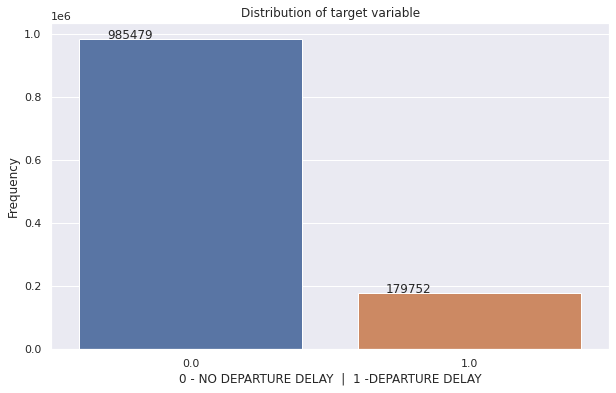

In [68]:
# Plot to visualize the target variable in the dataset:

sns.set(style="darkgrid")

plt.figure(figsize=(10,6))
ax = sns.countplot(x="DEP_DELAY", data=flight)
plt.title('Distribution of target variable')
plt.xlabel('0 - NO DEPARTURE DELAY  |  1 -DEPARTURE DELAY')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [69]:
# Percentage of True/False for Target Variable

print("Percentage of No Departure Delay")
print(((flight["DEP_DELAY"].value_counts()[0]/flight.shape[0])*100).round(2))
print()
print("Percentage of Departure Delay")
print(((flight["DEP_DELAY"].value_counts()[1]/flight.shape[0])*100).round(2))

Percentage of No Departure Delay
84.57

Percentage of Departure Delay
15.43


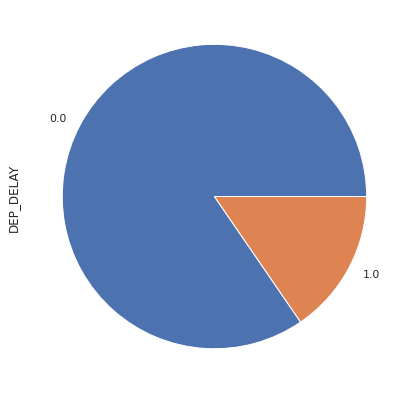

In [70]:
# Pie chart for the TARGET variable "DEP_DELAY"

plt.figure(figsize = (7, 7))
flight["DEP_DELAY"].value_counts().plot.pie()
plt.show()

# 0 -> NO DELAY 
# 1 -> DELAY

In [71]:
flight.corr()

,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_SEQ_ID,DEP_DELAY,DISTANCE
DAY_OF_WEEK,1.000000,0.058514,0.005676,0.005284,0.022633,0.018457
OP_CARRIER_FL_NUM,0.058514,1.000000,-0.055609,-0.060730,0.023933,-0.347112
ORIGIN_AIRPORT_SEQ_ID,0.005676,-0.055609,1.000000,0.016882,0.002874,0.090792
DEST_AIRPORT_SEQ_ID,0.005284,-0.060730,0.016882,1.000000,0.009602,0.090469
DEP_DELAY,0.022633,0.023933,0.002874,0.009602,1.000000,0.012421
DISTANCE,0.018457,-0.347112,0.090792,0.090469,0.012421,1.000000


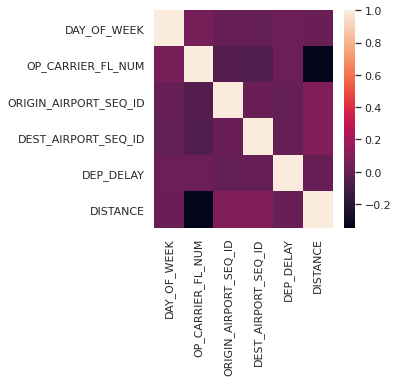

In [72]:
# Plotting the correaltion data heatmap

plt.figure(figsize = (4,4))
sns.heatmap(flight.corr())
plt.show()

In [73]:
# Model Building :

In [74]:
# Dropping columns 
flight = flight.drop(columns = ["TAIL_NUM", "ORIGIN_AIRPORT_SEQ_ID", "DEST_AIRPORT_SEQ_ID"])

In [75]:
flight.head()

,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_TIME_BLK,DISTANCE,DATE
0,2,9E,3280,GNV,ATL,06:01:00,0.0,0600-0659,300.0,2019-01-01
1,2,9E,3281,MSP,CVG,13:59:00,0.0,1400-1459,596.0,2019-01-01
2,2,9E,3282,DTW,CVG,12:15:00,0.0,1200-1259,229.0,2019-01-01
3,2,9E,3283,TLH,ATL,15:21:00,0.0,1500-1559,223.0,2019-01-01
4,2,9E,3284,ATL,FSM,18:47:00,0.0,1900-1959,579.0,2019-01-01


In [76]:
## We will require the day_of_month column only out of the date column , as year is in two categories only
# and month is january "1" for all rows hence, that is not a factor

flight["DAY_OF_MONTH"] = flight["DATE"].dt.day

In [77]:
## Drop "DATE" feature:
flight = flight.drop(columns = "DATE")

In [78]:
flight.head()

,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_TIME_BLK,DISTANCE,DAY_OF_MONTH
0,2,9E,3280,GNV,ATL,06:01:00,0.0,0600-0659,300.0,1
1,2,9E,3281,MSP,CVG,13:59:00,0.0,1400-1459,596.0,1
2,2,9E,3282,DTW,CVG,12:15:00,0.0,1200-1259,229.0,1
3,2,9E,3283,TLH,ATL,15:21:00,0.0,1500-1559,223.0,1
4,2,9E,3284,ATL,FSM,18:47:00,0.0,1900-1959,579.0,1


In [79]:
## Moving "DEP_DELAY" column and making it the last colunm in the dataset:
cols_at_end = ["DEP_DELAY"]
flight_data = flight[[c for c in flight if c not in cols_at_end] 
        + [c for c in cols_at_end if c in flight]]

In [80]:
flight_data.head()

,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,DISTANCE,DAY_OF_MONTH,DEP_DELAY
0,2,9E,3280,GNV,ATL,06:01:00,0600-0659,300.0,1,0.0
1,2,9E,3281,MSP,CVG,13:59:00,1400-1459,596.0,1,0.0
2,2,9E,3282,DTW,CVG,12:15:00,1200-1259,229.0,1,0.0
3,2,9E,3283,TLH,ATL,15:21:00,1500-1559,223.0,1,0.0
4,2,9E,3284,ATL,FSM,18:47:00,1900-1959,579.0,1,0.0


In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
## Selecting the cyclic features in the datasets: They need to be encoded separately

In [83]:
def encode(data, col, max_val):
    data.loc[:, col + '_SIN'] = np.sin(2 * np.pi * data[col]/max_val)
    data.loc[:, col + '_COS'] = np.cos(2 * np.pi * data[col]/max_val)
    return data


In [84]:
encode( flight_data, "DAY_OF_WEEK", 7)
encode( flight_data, "DAY_OF_MONTH", 30)

,DAY_OF_WEEK,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,DISTANCE,DAY_OF_MONTH,DEP_DELAY,DAY_OF_WEEK_SIN,DAY_OF_WEEK_COS,DAY_OF_MONTH_SIN,DAY_OF_MONTH_COS
0,2,9E,3280,GNV,ATL,06:01:00,0600-0659,300.0,1,0.0,0.974928,-0.222521,0.207912,0.978148
1,2,9E,3281,MSP,CVG,13:59:00,1400-1459,596.0,1,0.0,0.974928,-0.222521,0.207912,0.978148
2,2,9E,3282,DTW,CVG,12:15:00,1200-1259,229.0,1,0.0,0.974928,-0.222521,0.207912,0.978148
3,2,9E,3283,TLH,ATL,15:21:00,1500-1559,223.0,1,0.0,0.974928,-0.222521,0.207912,0.978148
4,2,9E,3284,ATL,FSM,18:47:00,1900-1959,579.0,1,0.0,0.974928,-0.222521,0.207912,0.978148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,5,9E,4812,TYS,DTW,10:02:00,0700-0759,443.0,31,1.0,-0.974928,-0.222521,0.207912,0.978148
607342,5,9E,4813,DTW,JFK,17:47:00,1700-1759,509.0,31,0.0,-0.974928,-0.222521,0.207912,0.978148
607343,5,9E,4814,GSP,LGA,05:54:00,0600-0659,610.0,31,0.0,-0.974928,-0.222521,0.207912,0.978148
607344,5,9E,4815,ATL,XNA,17:14:00,1700-1759,589.0,31,0.0,-0.974928,-0.222521,0.207912,0.978148


In [85]:
flight_data.columns

Index(['DAY_OF_WEEK', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'DEP_TIME_BLK', 'DISTANCE', 'DAY_OF_MONTH', 'DEP_DELAY',
       'DAY_OF_WEEK_SIN', 'DAY_OF_WEEK_COS', 'DAY_OF_MONTH_SIN',
       'DAY_OF_MONTH_COS'],
      dtype='object')

In [86]:
## Now, we can drop the original "DAY_OF_WEEK" and "DAY_OF_MONTH" columns from the dataset
flight_data = flight_data.drop(columns = ["DAY_OF_WEEK", "DAY_OF_MONTH"])

In [87]:
flight_data.dtypes

OP_CARRIER            object
OP_CARRIER_FL_NUM      int64
ORIGIN                object
DEST                  object
DEP_TIME              object
DEP_TIME_BLK          object
DISTANCE             float64
DEP_DELAY            float64
DAY_OF_WEEK_SIN      float64
DAY_OF_WEEK_COS      float64
DAY_OF_MONTH_SIN     float64
DAY_OF_MONTH_COS     float64
dtype: object

In [88]:
flight_data["DEP_TIME"]

0         06:01:00
1         13:59:00
2         12:15:00
3         15:21:00
4         18:47:00
            ...   
607341    10:02:00
607342    17:47:00
607343    05:54:00
607344    17:14:00
607345    18:41:00
Name: DEP_TIME, Length: 1165231, dtype: object

In [89]:
## We have departure time in 24 hour format 
## -- In order to apply cyclic encoding , we will have to convert it into minutes past midnight
## -- and then apply cyclic encoding to the dataset

In [90]:
# Extract hour from the "DEP_TIME" using str
flight_data["DEP_TIME"].astype(str).str[0:2]

0         06
1         13
2         12
3         15
4         18
          ..
607341    10
607342    17
607343    05
607344    17
607345    18
Name: DEP_TIME, Length: 1165231, dtype: object

In [91]:
# Extract minutes from the "DEP_TIME" using str
flight_data["DEP_TIME"].astype(str).str[3:5]

0         01
1         59
2         15
3         21
4         47
          ..
607341    02
607342    47
607343    54
607344    14
607345    41
Name: DEP_TIME, Length: 1165231, dtype: object

In [92]:
# "DEP_TIME" converted into minutes past midnight

((flight_data["DEP_TIME"].astype(str).str[0:2]).astype(int))*60 + (flight_data["DEP_TIME"].astype(str).str[3:5].astype(int))

0          361
1          839
2          735
3          921
4         1127
          ... 
607341     602
607342    1067
607343     354
607344    1034
607345    1121
Name: DEP_TIME, Length: 1165231, dtype: int64

In [93]:
dep_time_in_minutes = ((flight_data["DEP_TIME"].astype(str).str[0:2]).astype(int))*60 + (flight_data["DEP_TIME"].astype(str).str[3:5].astype(int))

In [94]:
def add_new_col(data, col, new_col):
    data.loc[:, col + '_MINUTES'] = new_col
    return data

In [95]:
## Creating "DEP_TIME_MINUTES" in terms of minutes_data:
add_new_col(flight_data, "DEP_TIME", dep_time_in_minutes)

,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,DISTANCE,DEP_DELAY,DAY_OF_WEEK_SIN,DAY_OF_WEEK_COS,DAY_OF_MONTH_SIN,DAY_OF_MONTH_COS,DEP_TIME_MINUTES
0,9E,3280,GNV,ATL,06:01:00,0600-0659,300.0,0.0,0.974928,-0.222521,0.207912,0.978148,361
1,9E,3281,MSP,CVG,13:59:00,1400-1459,596.0,0.0,0.974928,-0.222521,0.207912,0.978148,839
2,9E,3282,DTW,CVG,12:15:00,1200-1259,229.0,0.0,0.974928,-0.222521,0.207912,0.978148,735
3,9E,3283,TLH,ATL,15:21:00,1500-1559,223.0,0.0,0.974928,-0.222521,0.207912,0.978148,921
4,9E,3284,ATL,FSM,18:47:00,1900-1959,579.0,0.0,0.974928,-0.222521,0.207912,0.978148,1127
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,9E,4812,TYS,DTW,10:02:00,0700-0759,443.0,1.0,-0.974928,-0.222521,0.207912,0.978148,602
607342,9E,4813,DTW,JFK,17:47:00,1700-1759,509.0,0.0,-0.974928,-0.222521,0.207912,0.978148,1067
607343,9E,4814,GSP,LGA,05:54:00,0600-0659,610.0,0.0,-0.974928,-0.222521,0.207912,0.978148,354
607344,9E,4815,ATL,XNA,17:14:00,1700-1759,589.0,0.0,-0.974928,-0.222521,0.207912,0.978148,1034


In [96]:
max_time_in_a_day = 24*60

encode( flight_data, "DEP_TIME_MINUTES", max_time_in_a_day)


,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,DISTANCE,DEP_DELAY,DAY_OF_WEEK_SIN,DAY_OF_WEEK_COS,DAY_OF_MONTH_SIN,DAY_OF_MONTH_COS,DEP_TIME_MINUTES,DEP_TIME_MINUTES_SIN,DEP_TIME_MINUTES_COS
0,9E,3280,GNV,ATL,06:01:00,0600-0659,300.0,0.0,0.974928,-0.222521,0.207912,0.978148,361,0.999990,-0.004363
1,9E,3281,MSP,CVG,13:59:00,1400-1459,596.0,0.0,0.974928,-0.222521,0.207912,0.978148,839,-0.496217,-0.868199
2,9E,3282,DTW,CVG,12:15:00,1200-1259,229.0,0.0,0.974928,-0.222521,0.207912,0.978148,735,-0.065403,-0.997859
3,9E,3283,TLH,ATL,15:21:00,1500-1559,223.0,0.0,0.974928,-0.222521,0.207912,0.978148,921,-0.768842,-0.639439
4,9E,3284,ATL,FSM,18:47:00,1900-1959,579.0,0.0,0.974928,-0.222521,0.207912,0.978148,1127,-0.979045,0.203642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,9E,4812,TYS,DTW,10:02:00,0700-0759,443.0,1.0,-0.974928,-0.222521,0.207912,0.978148,602,0.492424,-0.870356
607342,9E,4813,DTW,JFK,17:47:00,1700-1759,509.0,0.0,-0.974928,-0.222521,0.207912,0.978148,1067,-0.998392,-0.056693
607343,9E,4814,GSP,LGA,05:54:00,0600-0659,610.0,0.0,-0.974928,-0.222521,0.207912,0.978148,354,0.999657,0.026177
607344,9E,4815,ATL,XNA,17:14:00,1700-1759,589.0,0.0,-0.974928,-0.222521,0.207912,0.978148,1034,-0.979925,-0.199368


In [97]:
flight_data.columns

Index(['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'DEP_TIME',
       'DEP_TIME_BLK', 'DISTANCE', 'DEP_DELAY', 'DAY_OF_WEEK_SIN',
       'DAY_OF_WEEK_COS', 'DAY_OF_MONTH_SIN', 'DAY_OF_MONTH_COS',
       'DEP_TIME_MINUTES', 'DEP_TIME_MINUTES_SIN', 'DEP_TIME_MINUTES_COS'],
      dtype='object')

In [98]:
## Columns added with sin and cos parameters w.r.t "DEP_TIME_MINUTES" column

In [99]:
## Now, we can drop "DEP_TIME" column and "DEP_TIME_MINUTES"
flight_data = flight_data.drop(columns = ["DEP_TIME", "DEP_TIME_MINUTES"])

In [100]:
## Dtypes of columns present in the dataset at this point
flight_data.dtypes

OP_CARRIER               object
OP_CARRIER_FL_NUM         int64
ORIGIN                   object
DEST                     object
DEP_TIME_BLK             object
DISTANCE                float64
DEP_DELAY               float64
DAY_OF_WEEK_SIN         float64
DAY_OF_WEEK_COS         float64
DAY_OF_MONTH_SIN        float64
DAY_OF_MONTH_COS        float64
DEP_TIME_MINUTES_SIN    float64
DEP_TIME_MINUTES_COS    float64
dtype: object

In [101]:
## Applying LabelEncoding on "ORIGIN" and "DEST" columns:

flight_data["ORIGIN"] = flight_data["ORIGIN"].astype('category')
flight_data["DEST"] = flight_data["DEST"].astype('category')

flight_data["ORIGIN_ENCODE"] = flight_data["ORIGIN"].cat.codes
flight_data["DEST_ENCODE"] = flight_data["DEST"].cat.codes

## Drop "ORIGIN" and "DEST" columns 
flight_data = flight_data.drop(columns = ["ORIGIN", "DEST"])

In [102]:
# One Hot encoding
flight_data = pd.get_dummies(data = flight_data, columns = ["OP_CARRIER", "DEP_TIME_BLK"], drop_first = True)
flight_data.head()

,OP_CARRIER_FL_NUM,DISTANCE,DEP_DELAY,DAY_OF_WEEK_SIN,DAY_OF_WEEK_COS,DAY_OF_MONTH_SIN,DAY_OF_MONTH_COS,DEP_TIME_MINUTES_SIN,DEP_TIME_MINUTES_COS,ORIGIN_ENCODE,DEST_ENCODE,OP_CARRIER_AA,OP_CARRIER_AS,OP_CARRIER_B6,OP_CARRIER_DL,OP_CARRIER_EV,OP_CARRIER_F9,OP_CARRIER_G4,OP_CARRIER_HA,OP_CARRIER_MQ,OP_CARRIER_NK,OP_CARRIER_OH,OP_CARRIER_OO,OP_CARRIER_UA,OP_CARRIER_WN,OP_CARRIER_YV,OP_CARRIER_YX,DEP_TIME_BLK_0600-0659,DEP_TIME_BLK_0700-0759,DEP_TIME_BLK_0800-0859,DEP_TIME_BLK_0900-0959,DEP_TIME_BLK_1000-1059,DEP_TIME_BLK_1100-1159,DEP_TIME_BLK_1200-1259,DEP_TIME_BLK_1300-1359,DEP_TIME_BLK_1400-1459,DEP_TIME_BLK_1500-1559,DEP_TIME_BLK_1600-1659,DEP_TIME_BLK_1700-1759,DEP_TIME_BLK_1800-1859,DEP_TIME_BLK_1900-1959,DEP_TIME_BLK_2000-2059,DEP_TIME_BLK_2100-2159,DEP_TIME_BLK_2200-2259,DEP_TIME_BLK_2300-2359
0,3280,300.0,0.0,0.974928,-0.222521,0.207912,0.978148,0.999990,-0.004363,130,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3281,596.0,0.0,0.974928,-0.222521,0.207912,0.978148,-0.496217,-0.868199,227,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3282,229.0,0.0,0.974928,-0.222521,0.207912,0.978148,-0.065403,-0.997859,97,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3283,223.0,0.0,0.974928,-0.222521,0.207912,0.978148,-0.768842,-0.639439,331,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3284,579.0,0.0,0.974928,-0.222521,0.207912,0.978148,-0.979045,0.203642,19,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [103]:
# Moving "DEP_DELAY" column and making it the last colunm in the dataset:
cols_at_end = ["DEP_DELAY"]
flight_data = flight_data[[c for c in flight_data if c not in cols_at_end] 
        + [c for c in cols_at_end if c in flight_data]]

In [104]:
flight_data.dtypes

OP_CARRIER_FL_NUM           int64
DISTANCE                  float64
DAY_OF_WEEK_SIN           float64
DAY_OF_WEEK_COS           float64
DAY_OF_MONTH_SIN          float64
DAY_OF_MONTH_COS          float64
DEP_TIME_MINUTES_SIN      float64
DEP_TIME_MINUTES_COS      float64
ORIGIN_ENCODE               int16
DEST_ENCODE                 int16
OP_CARRIER_AA               uint8
OP_CARRIER_AS               uint8
OP_CARRIER_B6               uint8
OP_CARRIER_DL               uint8
OP_CARRIER_EV               uint8
OP_CARRIER_F9               uint8
OP_CARRIER_G4               uint8
OP_CARRIER_HA               uint8
OP_CARRIER_MQ               uint8
OP_CARRIER_NK               uint8
OP_CARRIER_OH               uint8
OP_CARRIER_OO               uint8
OP_CARRIER_UA               uint8
OP_CARRIER_WN               uint8
OP_CARRIER_YV               uint8
OP_CARRIER_YX               uint8
DEP_TIME_BLK_0600-0659      uint8
DEP_TIME_BLK_0700-0759      uint8
DEP_TIME_BLK_0800-0859      uint8
DEP_TIME_BLK_0

In [105]:
# Loading X and y parameters for our model building

X = flight_data.iloc[:, :-1].values
y = flight_data.iloc[:, -1].values

In [106]:
# Split data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [107]:
# find index of columns to be scaled 
print(flight_data.columns.get_loc("OP_CARRIER_FL_NUM"))
print(flight_data.columns.get_loc("DISTANCE"))
print(flight_data.columns.get_loc("ORIGIN_ENCODE"))
print(flight_data.columns.get_loc("DEST_ENCODE"))


0
1
8
9


In [108]:
# Applying Feature Scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, [0, 1, 8, 9]] = sc.fit_transform(X_train[:, [0, 1, 8, 9]])
X_test[:, [0, 1, 8, 9]] = sc.transform(X_test[:, [0, 1, 8, 9]])


In [109]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
# Predicting the test set result : Logistic Classifier

y_pred = log_classifier.predict(X_test)

In [111]:
# Making the confusion matrix 

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : Logistic Regression")
print(cm)
print()
print("Accuracy Score : Logistic Regression")
print( accuracy_score(y_test, y_pred))


Confusion Matrix : Logistic Regression
[[196795    555]
 [ 27578   8119]]

Accuracy Score : Logistic Regression
0.8792818615987333


In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93    197350
         1.0       0.94      0.23      0.37     35697

    accuracy                           0.88    233047
   macro avg       0.91      0.61      0.65    233047
weighted avg       0.89      0.88      0.85    233047



In [113]:
# Model 2: Naive Bayes Algorithm

In [115]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
# Predicting the test set result : Naive Bayes

y_pred_nb = nb_classifier.predict(X_test)

In [117]:
# Making the confusion matrix : Naive Bayes

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix : Naive Bayes ")
print(cm)
print()
print("Accuracy Score : Naive Bayes ")
print( accuracy_score(y_test, y_pred_nb))

Confusion Matrix : Naive Bayes 
[[123967  73383]
 [ 16418  19279]]

Accuracy Score : Naive Bayes 
0.6146657112084687


In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.88      0.63      0.73    197350
         1.0       0.21      0.54      0.30     35697

    accuracy                           0.61    233047
   macro avg       0.55      0.58      0.52    233047
weighted avg       0.78      0.61      0.67    233047



In [119]:
# Model 3: DecisionTreeClassifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [121]:
# Predicting the test set result : Decision Tree Classifier

y_pred_dt = dt_classifier.predict(X_test)

In [122]:
# Making the confusion matrix : Decision Tree Classifier

cm = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix : Decision Tree Classifier ")
print(cm)
print()
print("Accuracy Score : Decision Tree Classifier ")
print( accuracy_score(y_test, y_pred_dt))

Confusion Matrix : Decision Tree Classifier 
[[189835   7515]
 [  8623  27074]]

Accuracy Score : Decision Tree Classifier 
0.9307521658721202


In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96    197350
         1.0       0.78      0.76      0.77     35697

    accuracy                           0.93    233047
   macro avg       0.87      0.86      0.86    233047
weighted avg       0.93      0.93      0.93    233047



In [124]:
## Applying K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_decision_tree = cross_val_score(estimator = dt_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies mean for Decision tree is : ")
print(accuracies_decision_tree.mean())
print()
print("Standard Deviation for Decision Tree accuracies is :")
print(accuracies_decision_tree.std())

Accuracies mean for Decision tree is : 
0.928356417912765

Standard Deviation for Decision Tree accuracies is :
0.0006631523314456069


In [125]:
# Model 4: Random Forest Classification

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [127]:
# Predicting the test set result : Random Forest Classifier

y_pred_rf = rf_classifier.predict(X_test)

In [128]:
# Making the confusion matrix : Random Forest Classifier

cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix : Random Forest Classifier ")
print(cm)
print()
print("Accuracy Score : Random Forest Classifier ")
print( accuracy_score(y_test, y_pred_rf))

Confusion Matrix : Random Forest Classifier 
[[195683   1667]
 [ 13215  22482]]

Accuracy Score : Random Forest Classifier 
0.9361416366655653


In [129]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96    197350
         1.0       0.93      0.63      0.75     35697

    accuracy                           0.94    233047
   macro avg       0.93      0.81      0.86    233047
weighted avg       0.94      0.94      0.93    233047



In [130]:
## Applying K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracies mean for Random Forest is : ")
print(accuracies_random_forest.mean())
print()
print("Standard Deviation for Random Forest accuracies is :")
print(accuracies_random_forest.std())

Accuracies mean for Random Forest is : 
0.93432412351646

Standard Deviation for Random Forest accuracies is :
0.0007487995375804332
